<a href="https://colab.research.google.com/github/karlinremian/Data-Mining/blob/main/Tugas_NaiveBayes_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Nama: Karolina Arisna Remian
- Nim: 202201018
- Kelas: SI (A)

- Naive Bayes menggunakan dataset Iris.csv:

import Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Import Dataset

In [ ]:
dataset = pd.read_csv ('Iris.csv')  # memanggil dataset
x = dataset.iloc[:,[1,3]].values   # membagi nilai x untuk ambil yang berisi kolom
y = dataset.iloc[:, -1].values   # membagi nilai y dari kolom terakir

In [ ]:
print (x)

[[5.1 1.4]
 [4.9 1.4]
 [4.7 1.3]
 [4.6 1.5]
 [5.  1.4]
 [5.4 1.7]
 [4.6 1.4]
 [5.  1.5]
 [4.4 1.4]
 [4.9 1.5]
 [5.4 1.5]
 [4.8 1.6]
 [4.8 1.4]
 [4.3 1.1]
 [5.8 1.2]
 [5.7 1.5]
 [5.4 1.3]
 [5.1 1.4]
 [5.7 1.7]
 [5.1 1.5]
 [5.4 1.7]
 [5.1 1.5]
 [4.6 1. ]
 [5.1 1.7]
 [4.8 1.9]
 [5.  1.6]
 [5.  1.6]
 [5.2 1.5]
 [5.2 1.4]
 [4.7 1.6]
 [4.8 1.6]
 [5.4 1.5]
 [5.2 1.5]
 [5.5 1.4]
 [4.9 1.5]
 [5.  1.2]
 [5.5 1.3]
 [4.9 1.5]
 [4.4 1.3]
 [5.1 1.5]
 [5.  1.3]
 [4.5 1.3]
 [4.4 1.3]
 [5.  1.6]
 [5.1 1.9]
 [4.8 1.4]
 [5.1 1.6]
 [4.6 1.4]
 [5.3 1.5]
 [5.  1.4]
 [7.  4.7]
 [6.4 4.5]
 [6.9 4.9]
 [5.5 4. ]
 [6.5 4.6]
 [5.7 4.5]
 [6.3 4.7]
 [4.9 3.3]
 [6.6 4.6]
 [5.2 3.9]
 [5.  3.5]
 [5.9 4.2]
 [6.  4. ]
 [6.1 4.7]
 [5.6 3.6]
 [6.7 4.4]
 [5.6 4.5]
 [5.8 4.1]
 [6.2 4.5]
 [5.6 3.9]
 [5.9 4.8]
 [6.1 4. ]
 [6.3 4.9]
 [6.1 4.7]
 [6.4 4.3]
 [6.6 4.4]
 [6.8 4.8]
 [6.7 5. ]
 [6.  4.5]
 [5.7 3.5]
 [5.5 3.8]
 [5.5 3.7]
 [5.8 3.9]
 [6.  5.1]
 [5.4 4.5]
 [6.  4.5]
 [6.7 4.7]
 [6.3 4.4]
 [5.6 4.1]
 [5.5 4. ]
 [5.5 4.4]

In [ ]:
print (y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Ubah label target y dari string menjadi angka, misal menggunakan LabelEncoder dari scikit-learn supaya kelasnya menjadi 0,1,2.
Setosa → 0
Versicolor → 1
Virginica → 2

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

Spilt Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [ ]:
print (x_train)

[[ 1.54399532e-02  2.25126850e-01]
 [-9.98450310e-02  1.13559562e-01]
 [ 1.05300481e+00  9.50314227e-01]
 [-1.36797986e+00 -1.39259884e+00]
 [ 1.16828980e+00  7.27179649e-01]
 [-1.02212490e+00 -1.22524790e+00]
 [-5.60984968e-01 -1.28103155e+00]
 [-1.02212490e+00 -1.65358660e-01]
 [ 7.07149859e-01  9.50314227e-01]
 [ 9.37719827e-01  1.06188152e+00]
 [ 1.30724937e-01  6.71396005e-01]
 [ 9.37719827e-01  1.11766516e+00]
 [-3.30414999e-01  5.77759173e-02]
 [ 2.09056967e+00  1.28501609e+00]
 [ 4.76579890e-01  5.04045072e-01]
 [-4.45699984e-01  1.99227301e-03]
 [ 4.76579890e-01  6.15612361e-01]
 [ 4.76579890e-01  7.27179649e-01]
 [-1.13740989e+00  3.92477783e-01]
 [ 4.76579890e-01  6.71396005e-01]
 [ 1.28357478e+00  5.04045072e-01]
 [ 7.07149859e-01  7.82963294e-01]
 [ 1.30724937e-01  3.92477783e-01]
 [-1.25269487e+00 -1.22524790e+00]
 [-9.98450310e-02  7.27179649e-01]
 [-3.30414999e-01  2.25126850e-01]
 [-3.30414999e-01 -1.09575016e-01]
 [-4.45699984e-01  1.13559562e-01]
 [ 2.46009922e-01  4

In [ ]:
print (x_test)

[[-0.09984503  0.72717965]
 [ 0.13072494  0.11355956]
 [-0.44569998 -1.33681519]
 [ 1.62942973  1.39658338]
 [-1.0221249  -1.28103155]
 [ 0.47657989  1.22923245]
 [-1.0221249  -1.39259884]
 [ 0.93771983  0.50404507]
 [ 1.05300481  0.55982872]
 [ 0.24600992  0.11355956]
 [ 0.24600992  1.00609787]
 [ 0.59186487  0.39247778]
 [ 0.24600992  0.50404507]
 [ 0.70714986  0.44826143]
 [ 0.24600992  0.50404507]
 [-1.13740989 -1.28103155]
 [ 0.13072494  0.39247778]
 [-0.44569998  0.33669414]
 [-1.25269487 -1.33681519]
 [-0.56098497 -1.39259884]
 [-0.330415    0.61561236]
 [-0.330415    0.39247778]
 [-1.25269487 -1.05789697]
 [-1.71383481 -1.33681519]
 [ 0.36129491  0.55982872]
 [-1.48326484 -1.55994977]
 [-0.90683992 -1.05789697]
 [ 0.36129491  0.28091049]
 [-1.0221249  -0.27692595]
 [-1.0221249  -1.2252479 ]
 [ 0.59186487  0.95031423]
 [-0.56098497  0.39247778]
 [-0.79155494 -1.28103155]
 [ 0.24600992  0.61561236]
 [ 0.59186487  1.00609787]
 [-0.79155494  0.05777592]
 [-0.21513002 -1.16946426]
 

In [ ]:
print (y_train)

[1 1 2 0 2 0 0 1 2 2 2 2 1 2 1 1 2 2 2 2 1 2 1 0 2 1 1 1 1 2 0 0 2 1 0 0 1
 0 2 1 0 1 2 1 0 2 2 2 2 0 0 2 2 0 2 0 2 2 0 0 2 0 0 0 1 2 2 0 0 0 1 1 0 0
 1 0 2 1 2 1 0 2 0 2 0 0 2 0 2 1 1 1 2 2 1 1 0 1 2 2 0 1 1 1 1 0 0 0 2 1 2
 0]


In [ ]:
print (y_test)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 1]


latih model naive_bayes dengan data training

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

Predicting the test set result

In [ ]:
y_pred = classifier.predict(x_test) #menghitung nilai

In [ ]:
from sklearn.metrics import confusion_matrix # menghitung keakurasian hasil prediksi
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[13  0  0]
 [ 0 13  3]
 [ 0  3  6]]


In [ ]:
from sklearn.metrics import accuracy_score
akurasi = accuracy_score(y_test, y_prediksi)
print ("Tingkat Akurasi : %d persen " % (akurasi*100))

Tingkat Akurasi : 84 persen 


<ipython-input-87-cf8895c6c6a2>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


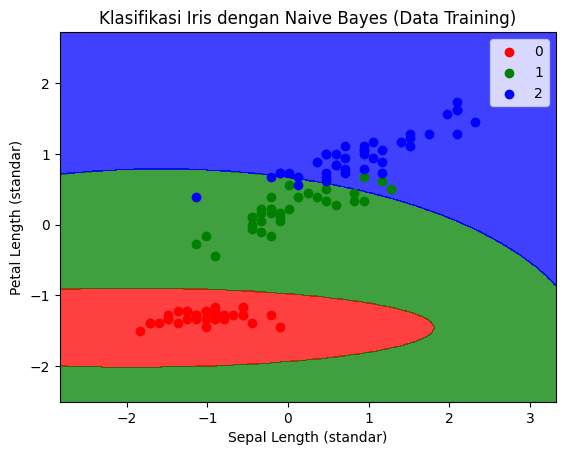

In [ ]:
# Visualisasi hasil pada data training
x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=le.classes_[j])

plt.title('Klasifikasi Iris dengan Naive Bayes (Data Training)')
plt.xlabel('Sepal Length (standar)')
plt.ylabel('Petal Length (standar)')
plt.legend()
plt.show()

<ipython-input-88-d5735cdb75da>:12: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],


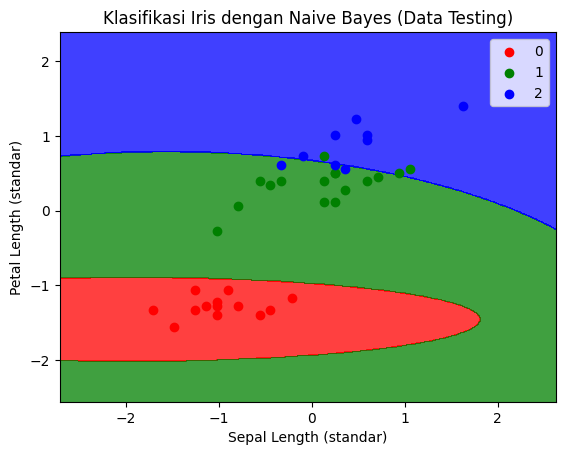

In [ ]:
# Visualisasi hasil pada data testing
x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('red', 'green', 'blue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('red', 'green', 'blue'))(i), label=le.classes_[j])

plt.title('Klasifikasi Iris dengan Naive Bayes (Data Testing)')
plt.xlabel('Sepal Length (standar)')
plt.ylabel('Petal Length (standar)')
plt.legend()
plt.show()
